# General information

Links to Raw Acoustic Data for experiment [p4581](https://psu.box.com/s/6c2mkkb8s3qhb74urx18igbk5sg7iius).
<br />Data shared by David Chas Bolton. More information on his personal [site](https://sites.psu.edu/chasbolton/).

<br />The .npz files contain the raw continuous time series data, single channel-33 and time to failure. Acoustic data are recorded continuously at 4 MHz throughout the experiment from a 14-bit data acquisition system.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import os.path as osp

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = '../input/laboratory-acoustic-data-exp4581/p4581'

# How load?
<br>Access to Acoustic Data: ``numpy.load("earthquake_*.npz")['acoustic_data'] ``
<br>Time between acoustica data by axis = 1: 0.252016890769332e-6
<br>Time between acoustica data by axis = 0 contained here: ``numpy.load("earthquake_*.npz")['ttf'] ``

In [7]:
acDataStd = np.empty((0,))
acTime = np.empty((0,))
events = 297

for i in range(events):
    a = np.load(osp.join(path, f"earthquake_{i:03d}.npz"))['acoustic_data'] 
    t = np.load(osp.join(path, f"earthquake_{i:03d}.npz"))['ttf'] 
    acDataStd = np.hstack([acDataStd, a.std(axis=1)])
    acTime = np.hstack([acTime, t])

# Plot std and single event from set

Data have various std by time. Its terms of the experiment.

In [10]:
# smooth data
N = 1000
acDataStd = np.convolve(acDataStd, np.ones((N))/ N, mode='same')

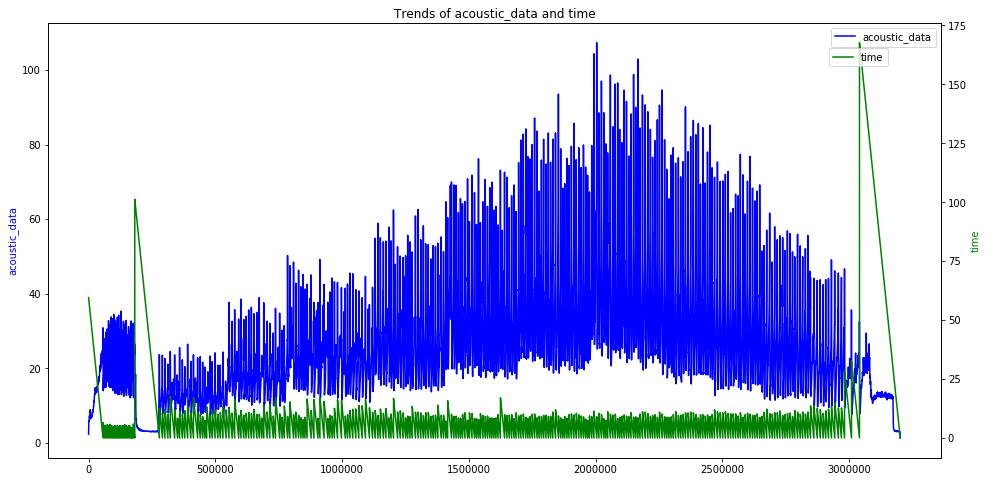

In [11]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time")
plt.plot(acDataStd, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(acTime, color='g')
ax2.set_ylabel('time', color='g')
plt.legend(['time'], loc=(0.875, 0.9))
plt.grid(False)

We actually can see different parts of set with chenged constant stress.
<br />![a classic laboratory earthquake model](https://i.imgur.com/moMmVqh.jpg)

In [3]:
event = 50
acData = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['acoustic_data'] 
acTime = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['ttf'] 

In [4]:
steps = np.arange(4096) * 0.252016890769332e-6
t = acTime[:, np.newaxis] + np.flip(steps)[np.newaxis]

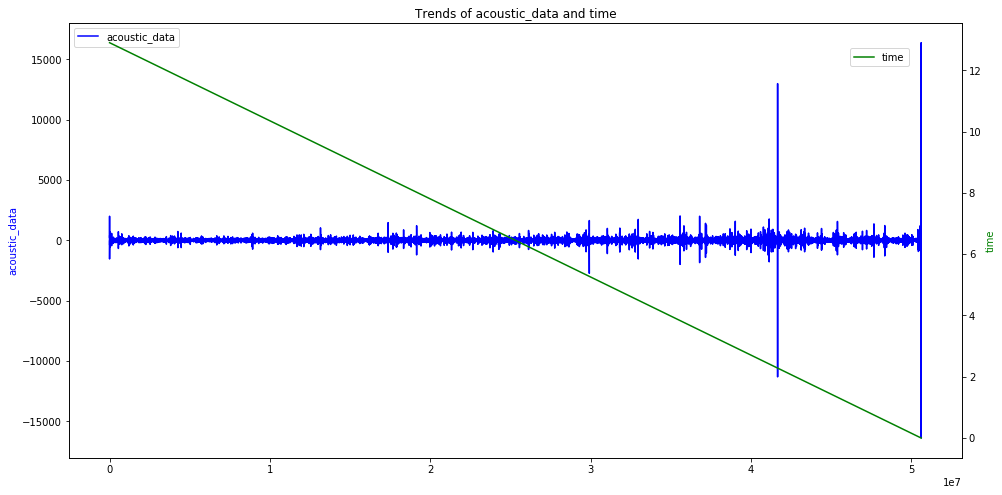

In [5]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time")
plt.plot(acData.flatten(), color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(t.flatten(), color='g')
ax2.set_ylabel('time', color='g')
plt.legend(['time'], loc=(0.875, 0.9))
plt.grid(False)

In [ ]:
event = 3
acData = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['acoustic_data'] 
acTime = np.load(osp.join(path, f"earthquake_{event:03d}.npz"))['ttf'] 

In [ ]:
steps = np.arange(4096) * 0.252016890769332e-6
t = acTime[:, np.newaxis] + np.flip(steps)[np.newaxis]

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time")
plt.plot(acData.flatten(), color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(t.flatten(), color='g')
ax2.set_ylabel('time', color='g')
plt.legend(['time'], loc=(0.875, 0.9))
plt.grid(False)